Hello!

When looking at reviews online is the body of text or the title the most helpful information in determining the rating of the product? 

My first instinct is a good title might more clearly point to a good review. It is probably a simple, short, sweet, statement about how much someone likes or hates a product. It needs to to be able to get someone to read the rest of the review. At the same time the body of the text has much more information and may (or may not) clearly state someones opinion.

I have had much less experience with NLP so I wanted to see how much I could work through. NLP is becoming used more and more and is a very different type of problem. However, we should still explore this problem like a typical Machine Learning problem. This is a public dataset from Kaggle. This is a list of over 71,045 reviews from 1,000 different products provided by Datafiniti's Product Database.

1. Import Data
2. EDA
3. Transformation
4. Algorithms
5. Refinement
6. Reccomendation

# 1. Import Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import os
print(os.listdir())

['.ipynb_checkpoints', 'Reviews Project.ipynb']


Import our usual suspects and look at the data.  We should check the data dictionary to gain more information about each column before starting EDA. Simply looking at the first columns we can already see NaN values. 

In [2]:
df = pd.read_csv('../data/GrammarandProductReviews.csv')
df.head(3)

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391


Immediatley we can start to see more information about this dataset. Our main features are "reviews.id" and "reviewws.title". We can gain more information about the data from some of the other features but will mostly be using reviews for the acttual Machine Learning. In addition we also see we are looking at a very large dataset and many missing values.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71044 entries, 0 to 71043
Data columns (total 25 columns):
id                      71044 non-null object
brand                   71044 non-null object
categories              71044 non-null object
dateAdded               71044 non-null object
dateUpdated             71044 non-null object
ean                     39065 non-null object
keys                    71044 non-null object
manufacturer            70903 non-null object
manufacturerNumber      70841 non-null object
name                    71044 non-null object
reviews.date            70977 non-null object
reviews.dateAdded       71044 non-null object
reviews.dateSeen        71044 non-null object
reviews.didPurchase     32158 non-null object
reviews.doRecommend     60429 non-null object
reviews.id              32158 non-null float64
reviews.numHelpful      32508 non-null float64
reviews.rating          71044 non-null int64
reviews.sourceURLs      71044 non-null object
reviews.text    

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

In [5]:
df['reviews.rating'].describe()

count    71044.000000
mean         4.385747
std          1.067659
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: reviews.rating, dtype: float64

It is interesting to note that we have such large disparity between the different ratings that we are looking to predict. Because of this we will need to ensure that our train and test data splits have somewhat similar variation in order to avoid working with a dataset that is unrealistic compared to the original data.

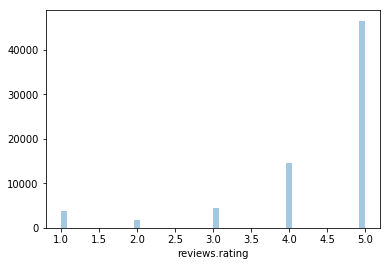

In [6]:
sns.distplot(df['reviews.rating'],kde = False)

In [7]:
split = StratifiedShuffleSplit(n_splits=1, test_size = .2)

for train_index, test_index in split.split(df, df["reviews.rating"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

reviews_df = strat_train_set

# 2. EDA

FIrst, lets start by making a word cloud to see what are the most common words that people use in their title and reviews.

In [8]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(stopwords = stopwords,
                          max_words = 200,
                          max_font_size = 60,
                          scale = 2).generate(str(data))
    
    fig = plt.figure(figsize = (12,15))
    plt.imshow(wordcloud)
    plt.show()

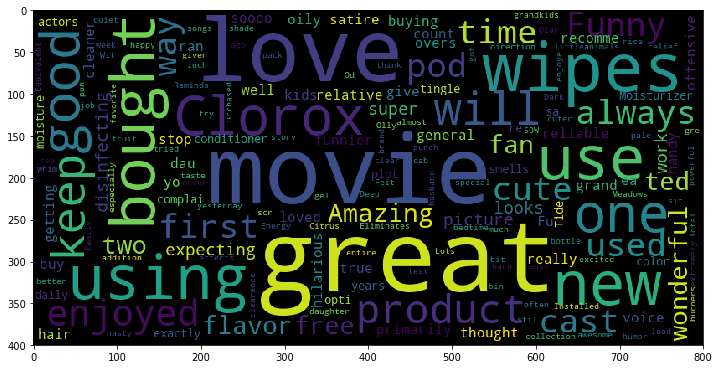

In [9]:
show_wordcloud(reviews_df['reviews.text'])

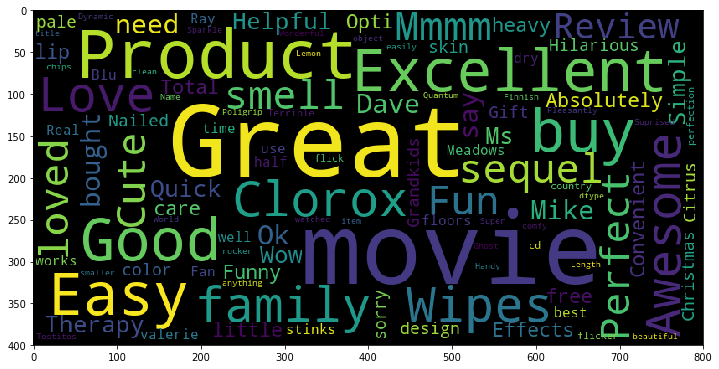

In [10]:
show_wordcloud(reviews_df['reviews.title'])

While wordclouds in general can be tough to sparse through we can get some intuition about our data. The reviews has a lot more descriptive words about the product(tide pod, product, version), while our title data features a lot more adjectives (Great, Excellent, Awesome). We also have a greater variety of words in the text as compared to the title.

Before going further into the actual text let's see what type of products we are dealing with.

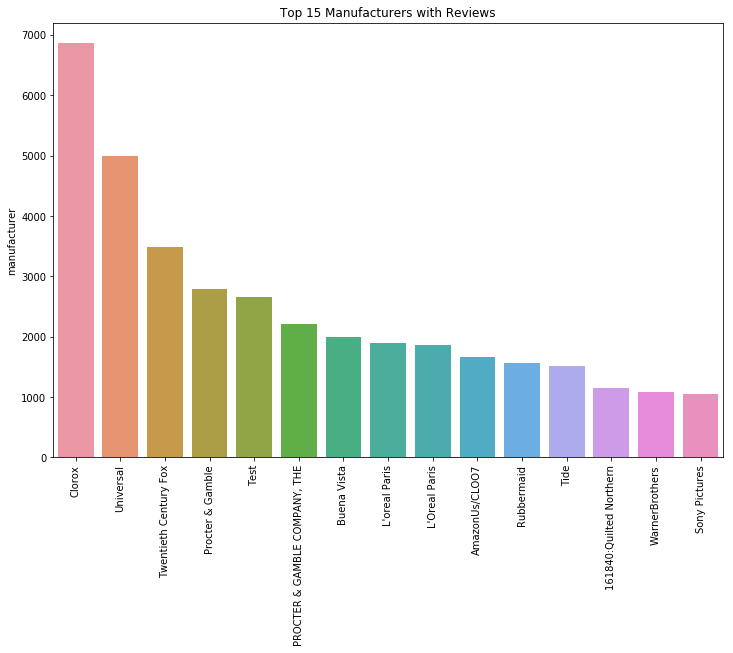

In [11]:
def barplot(x, title):

    x_manu = reviews_df[x].value_counts()[:15].index
    y_manu = reviews_df[x].value_counts()[:15]

    fig = plt.figure(figsize = (12,8))

    sns.barplot(x = x_manu,y = y_manu)

    plt.xticks(rotation=90)
    plt.title(title)

barplot("manufacturer", "Top 15 Manufacturers with Reviews")

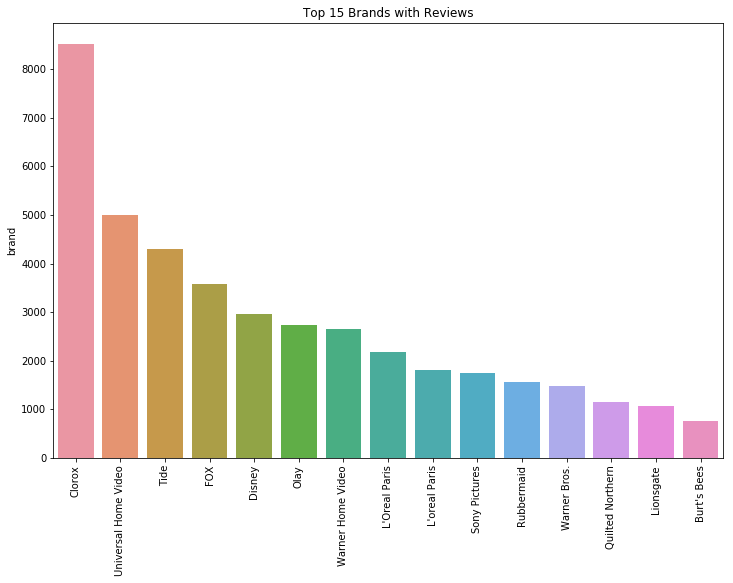

In [12]:
def barplot(x, title):

    x_manu = reviews_df[x].value_counts()[:15].index
    y_manu = reviews_df[x].value_counts()[:15]

    fig = plt.figure(figsize = (12,8))

    sns.barplot(x = x_manu,y = y_manu)

    plt.xticks(rotation=90)
    plt.title(title)

barplot("brand", "Top 15 Brands with Reviews")

Before looking at any other columns we should see how much data is within the remaining columns. Considering we are dealing with Online Reviews there may be a lot of fields that people do not always fill in. In addition we shouldn't waste our time if the columns are missing too much.

One of the most key points below is that our text and title columns have missing values. Many of the functions we plan to apply to this data does not like Nan values. Because both comprise less than 1% of our data (and mean imputing does not work on text data), we will drop these rows from our data.

In [42]:
def missing_values(x):
    Total = x.isnull().sum()
    Percent = (Total / (len(x)))*100
    Missing = pd.concat([Total,Percent], axis = 1)
    Missing = Missing.rename(columns = {0: "Total Missing Values", 1:"% Missing"})
    print(Missing)
print(missing_values(df))

                      Total Missing Values  % Missing
id                                       0   0.000000
brand                                    0   0.000000
categories                               0   0.000000
dateAdded                                0   0.000000
dateUpdated                              0   0.000000
ean                                  31979  45.012950
keys                                     0   0.000000
manufacturer                           141   0.198469
manufacturerNumber                     203   0.285738
name                                     0   0.000000
reviews.date                            67   0.094308
reviews.dateAdded                        0   0.000000
reviews.dateSeen                         0   0.000000
reviews.didPurchase                  38886  54.735094
reviews.doRecommend                  10615  14.941445
reviews.id                           38886  54.735094
reviews.numHelpful                   38536  54.242441
reviews.rating              

In [49]:
reviews_df.dropna(axis = 0, subset = ["reviews.text"], inplace = True)
reviews_df.dropna(axis = 0, subset = ["reviews.title"], inplace = True)

In [50]:
missing_values(reviews_df)

                      Total Missing Values  % Missing
id                                       0   0.000000
brand                                    0   0.000000
categories                               0   0.000000
dateAdded                                0   0.000000
dateUpdated                              0   0.000000
ean                                  25588  45.335034
keys                                     0   0.000000
manufacturer                           116   0.205521
manufacturerNumber                     146   0.258673
name                                     0   0.000000
reviews.date                            52   0.092130
reviews.dateAdded                        0   0.000000
reviews.dateSeen                         0   0.000000
reviews.didPurchase                  30720  54.427554
reviews.doRecommend                   8175  14.483895
reviews.id                           30720  54.427554
reviews.numHelpful                   30394  53.849970
reviews.rating              

# 3. Transformation

One of the simplest and most helpful transformations to apply to text data is how long each "item" is. I expect we will see the general trend of titles being much shorter than their text counterparts.

In [55]:
reviews_df["title_length"] = reviews_df["reviews.title"].apply(len)

In [75]:
reviews_df["text_length"] = reviews_df["reviews.text"].apply(len)

This also shows that not every plot gives all of the information we need. While we can gleam general information about the distribution of the counts it is not as immediatley helpful as we might think.

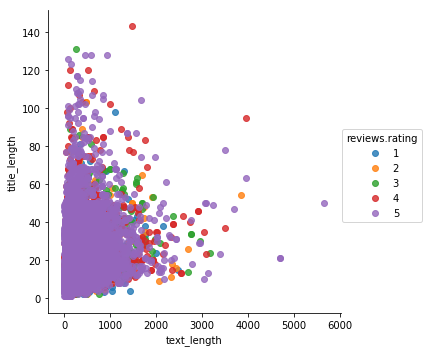

In [74]:
sns.lmplot(x = "text_length",
          y = "title_length",
          data = reviews_df,
          hue = "reviews.rating",
          fit_reg = False)

In [97]:
score_1 = reviews_df[reviews_df['reviews.rating'] == 1]
score_3 = reviews_df[reviews_df['reviews.rating'] == 3]
score_5 = reviews_df[reviews_df['reviews.rating'] == 5]

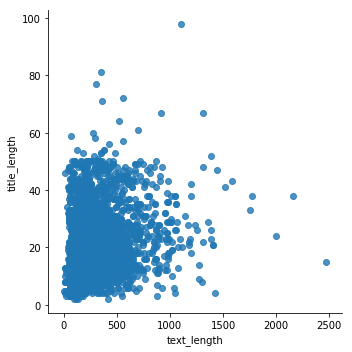

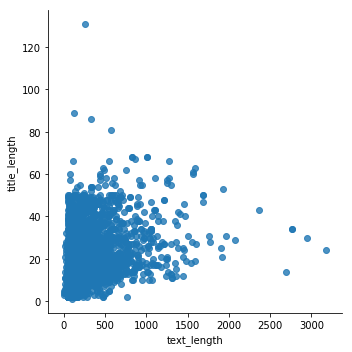

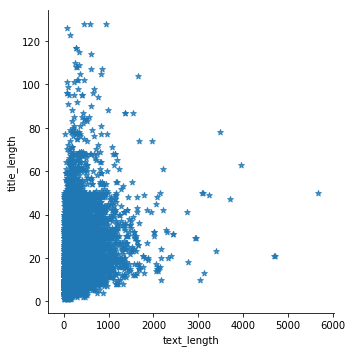

In [98]:
sns.lmplot(x = "text_length",
          y = "title_length",
          data = score_1,
          fit_reg = False)
sns.lmplot(x = "text_length",
          y = "title_length",
          data = score_3,
          fit_reg = False)
sns.lmplot(x = "text_length",
          y = "title_length",
          data = score_5,
          markers = "*", 
          fit_reg = False)

By splitting our charts more clearly we can start to see the general trend just between reviews rated 1 , 3, and 5. 1 and 3 review scores do not see much of a noticable difference but 5 start reviews are much more noticeably different. They have less text and much longer titles. Something our algorithms would be able to use.

### Vectorize!

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
word_vectorizer = TfidfVectorizer(
    min_df = 3,
    strip_accents = 'unicode',
    max_features = None,
    analyzer = 'word',
    token_pattern = r'\w{1,}',
    ngram_range = (1,1), 
    use_idf = 1,
    smooth_idf = 1,
    sublinear_tf=1,
    stop_words = 'english')

word_vectorizer.fit(textframe["reviews.text"])
train_word_features = word_vectorizer.transform(textframe["reviews.text"])

In [ ]:
title_vectorizer = TfidfVectorizer(
    min_df = 3,
    strip_accents = 'unicode',
    max_features = None,
    analyzer = 'word',
    token_pattern = r'\w{1,}',
    ngram_range = (1,1), 
    use_idf = 1,
    smooth_idf = 1,
    sublinear_tf=1,
    stop_words = 'english')
title_vectorizer.fit(textframe["reviews.title"])
train_title_features = word_vectorizer.transform(textframe["reviews.title"])

# 4. Algorithms

## Baseline

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_features,reviews_df["reviews.rating"] ,test_size=0.2,random_state=101)

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## 1. Random Forest

In [ ]:
def forest(X_train, X_test, y_train, y_test):
    classifier = RandomForestClassifier(n_estimators = 200,min_samples_leaf = 3 )
    classifier.fit(X_train,y_train)
    preds=classifier.predict(X_test)
    print(accuracy_score(y_test,preds))

## 2. Naive_Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
def naive_bayes(X_train, X_test, y_train, y_test):
    clf = MultinomialNB().fit(X_train, y_train)
    predsclf = clf.predict(X_test)
    print(accuracy_score(y_test,predsclf))

## 3. SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
def svc(X_train, X_test, y_train, y_test):
    model = SVC()
    model.fit(X_train,y_train)
    predsvm = model.predict(X_test)
    print(accuracy_score(y_test,predsvm))

# 5. Refinement

In [ ]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [ ]:
grid.fit(X_train,y_train)